In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math

# Import Data

In [2]:
data_arabica_path = "coffee_quality_data/arabica_data_cleaned.csv"
arabica_df = pd.read_csv(data_arabica_path)

# Exploratory Data Analysis

In [16]:
def eda_overview(df):
    print("🔹 Shape:", df.shape)
    # print("\n🔹 Data Types:\n", df.dtypes)
    print("\n🔹 Missing Values:\n", df.isnull().sum())
    # print("\n🔹 Summary Statistics:\n", df.describe())


In [18]:
# eda_overview(arabica_df)
arabica_df.isnull().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 356
Lot.Number               1041
Mill                      310
ICO.Number                148
Company                   209
Altitude                  223
Region                     57
Producer                  230
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   201
Processing.Method         152
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

## Coffee Production By Country

In [5]:
arabica_df["Country.of.Origin"].value_counts()[:5]

Country.of.Origin
Mexico       236
Colombia     183
Guatemala    181
Brazil       132
Taiwan        75
Name: count, dtype: int64

In [6]:
# Create choropleth map
fig = px.choropleth(
    arabica_df,
    locations="Country.of.Origin",          # column with country names
    locationmode="country names", # can also use ISO codes
    color="Number.of.Bags",    # column to color by
    hover_name="Country.of.Origin",         # info on hover
    color_continuous_scale="YlOrBr",
    title="Coffee Production by Country (Arabica Beans)"
)

fig.show()

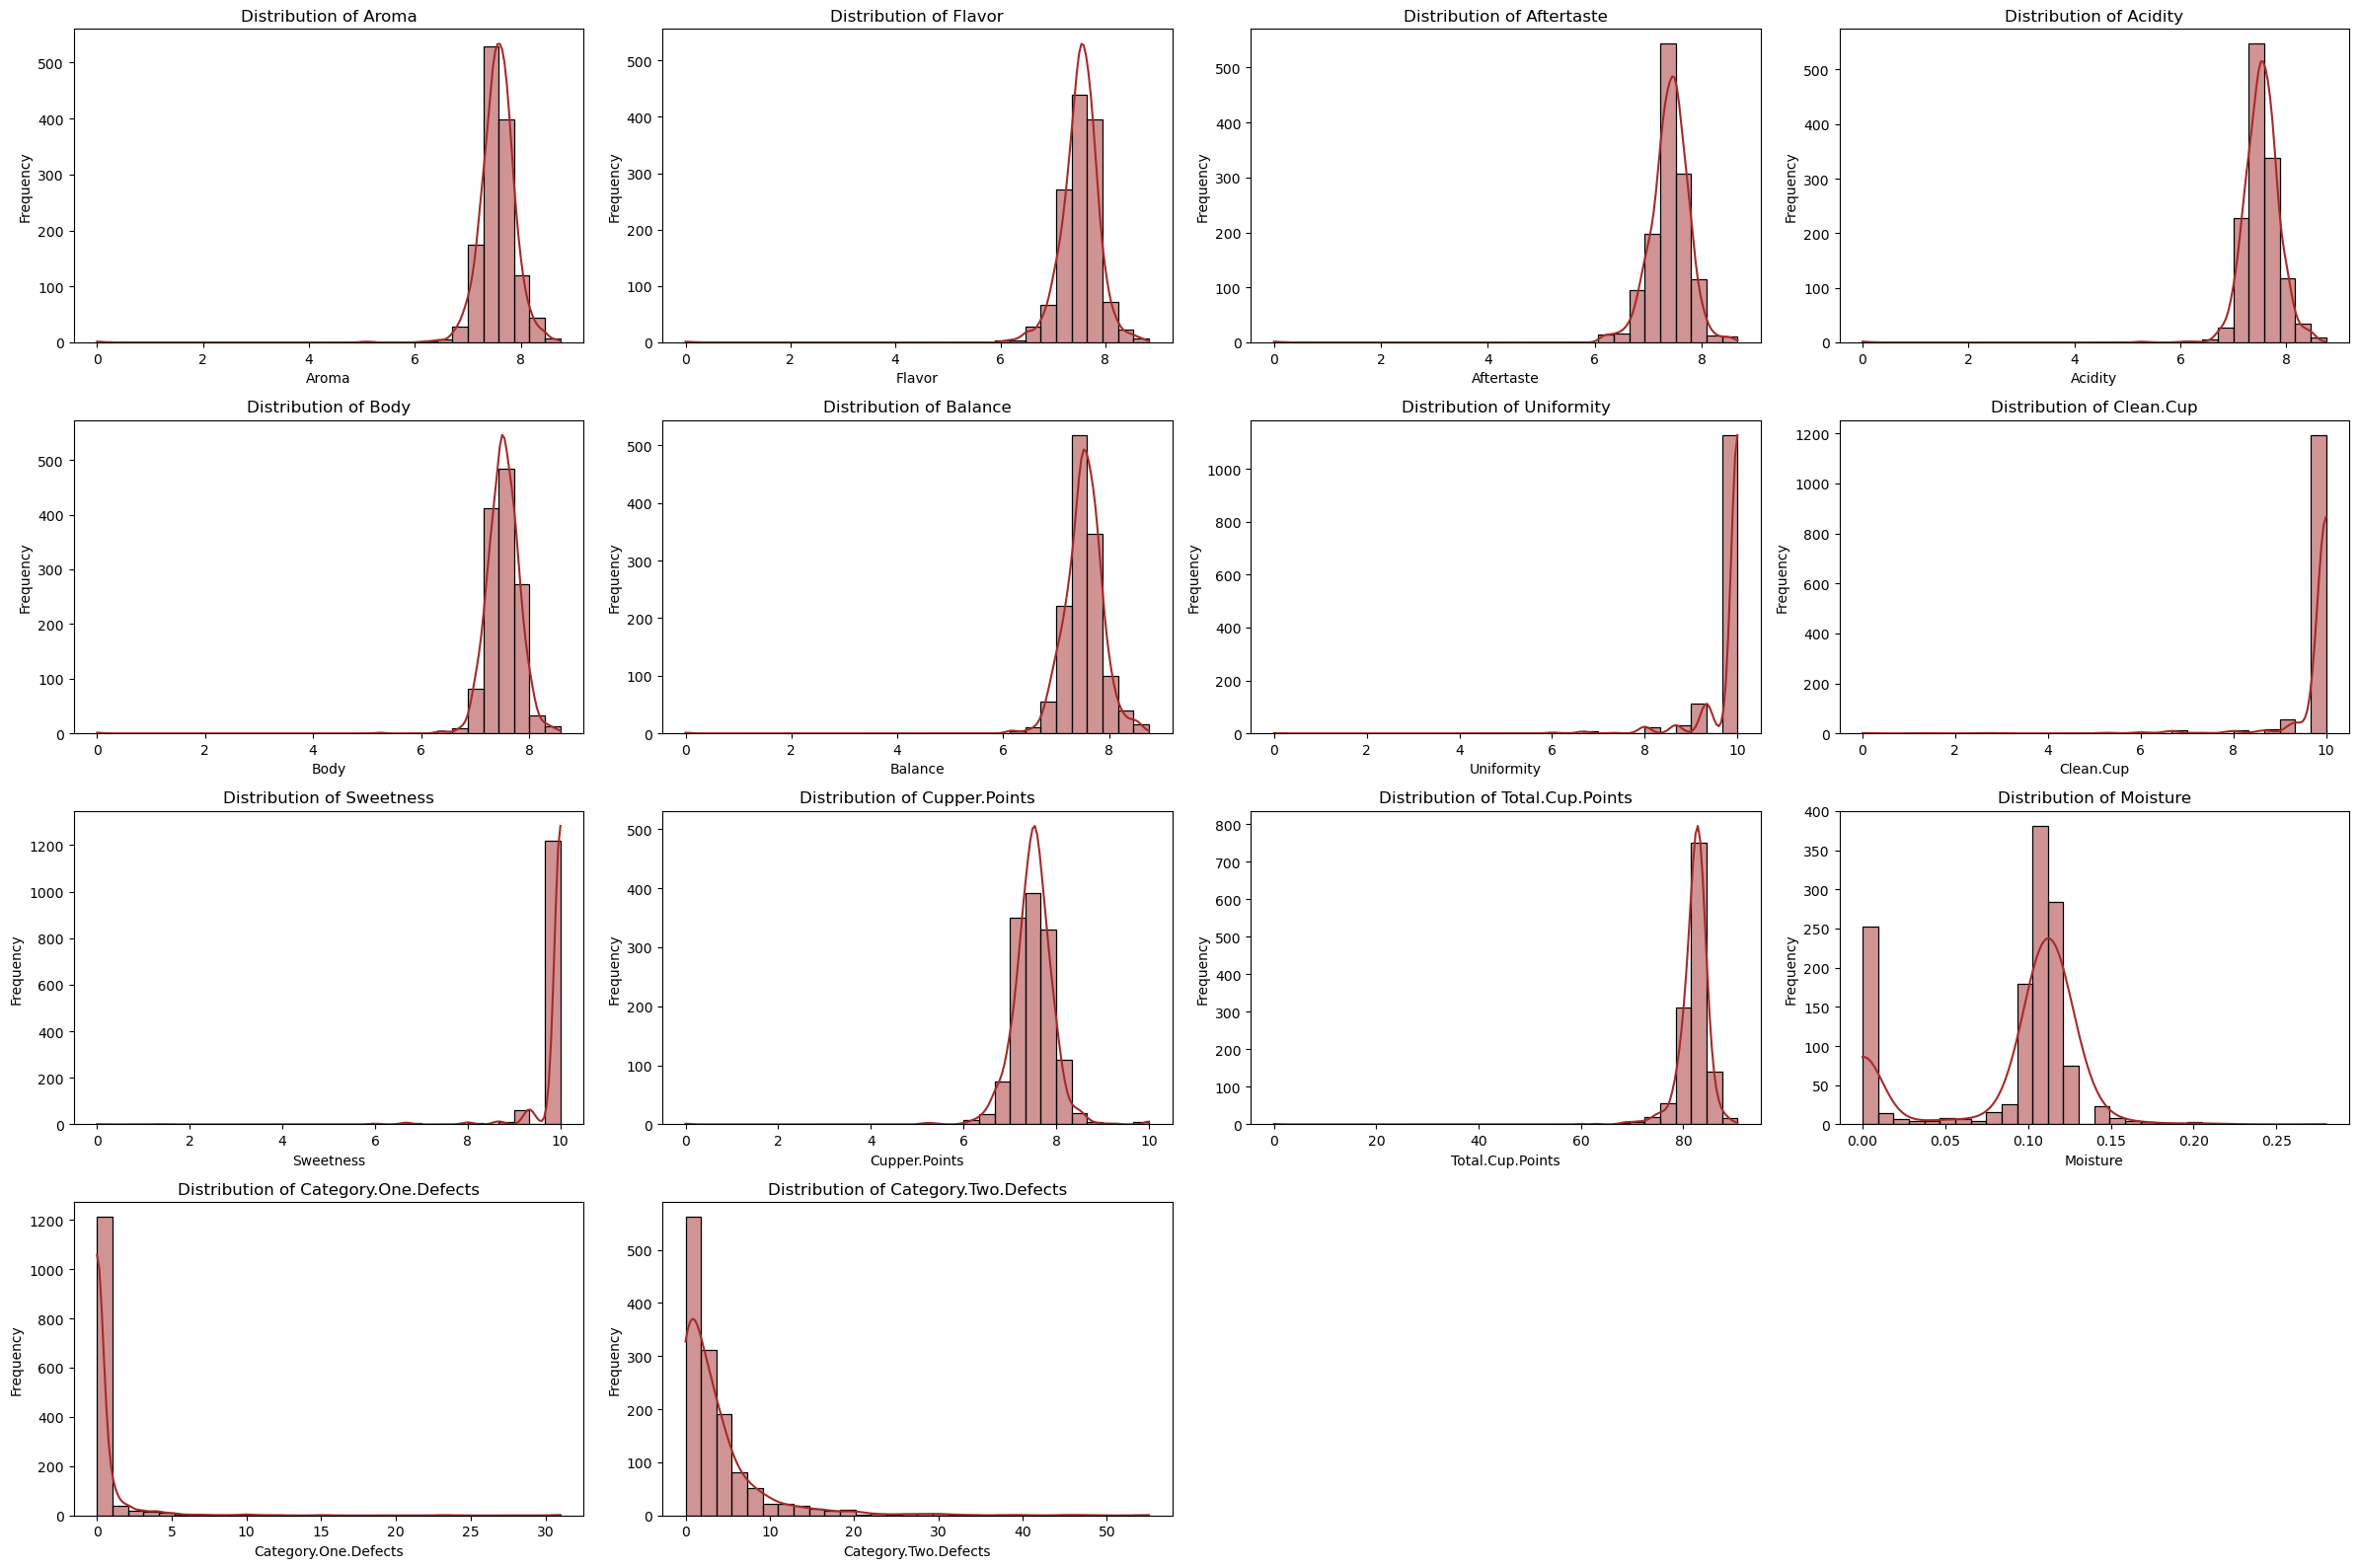

In [7]:
numerical_features = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
    'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
    'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
    'Category.Two.Defects'
]

def plot_numerical_distributions(df, features, n_cols=4):
    n_features = len(features)
    n_rows = math.ceil(n_features / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
    axes = axes.flatten()  # flatten in case of single row
    
    for i, feature in enumerate(features):
        sns.histplot(df[feature], bins=30, kde=True, color='brown', edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
    
    # Turn off any unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()




plot_numerical_distributions(arabica_df, numerical_features)

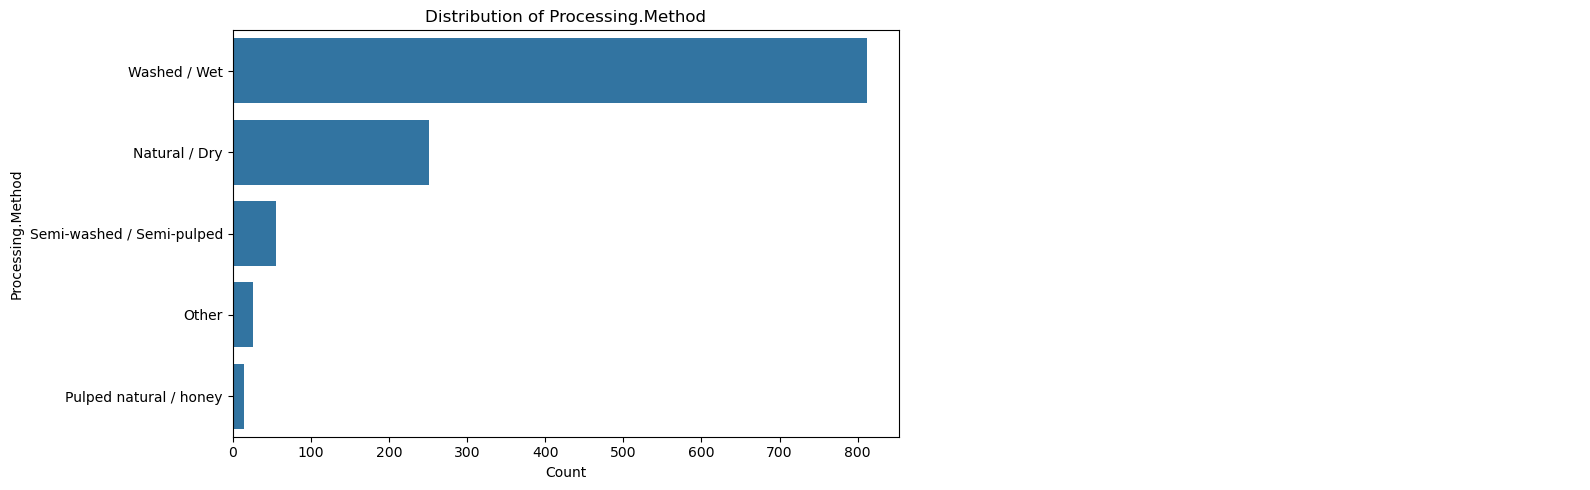

In [11]:

categorical_features = [
    'Processing.Method'
]

def plot_categorical_distributions(df, features, n_cols=2):
    n_features = len(features)
    n_rows = math.ceil(n_features / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*5))
    axes = axes.flatten()  # flatten in case of single row
    
    for i, feature in enumerate(features):
        sns.countplot(y=df[feature], order=df[feature].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(feature)
    
    # Turn off any unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_categorical_distributions(arabica_df, categorical_features)